In [9]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

NUM_DATASET = 1000

random.seed(555)
random_set = [random.randint(0,NUM_DATASET) for i in range(5)]

<h1> IMPORT INPUT </h1>

In [10]:
file_path = "data/"
cols = ['id', 'u', 'v', 'a', 'b', 'theta']

dfs = []

for i in range(NUM_DATASET):
    file_name = f"feature_{i}.csv"
    data = np.loadtxt(file_path+file_name, delimiter=",")
    df = pd.DataFrame(data,columns=cols)
    dfs.append(df)

dfs[0].head(10)

,id,u,v,a,b,theta
0,0.0,539.780457,624.005554,15.411187,15.704925,160.155014
1,1.0,451.632477,624.000000,14.539053,16.119146,0.000000
2,2.0,363.207428,624.000000,15.300096,15.646781,0.000000
3,3.0,274.919281,623.939026,15.161743,15.475454,73.199013
4,4.0,803.964355,623.623901,14.787533,16.157616,87.434769
5,5.0,716.053101,623.746521,15.146132,15.757395,85.139633
6,6.0,627.664612,624.030151,14.333721,15.370324,175.839371
7,7.0,539.605774,535.872375,15.413478,15.827074,109.619049
8,8.0,451.289581,536.000000,14.274856,15.305424,0.000000
9,9.0,362.956451,535.704529,15.376963,15.824376,163.403046


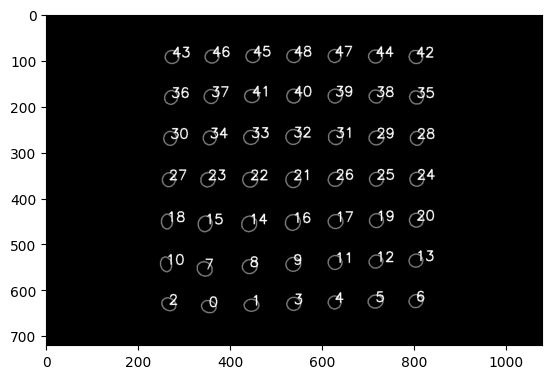

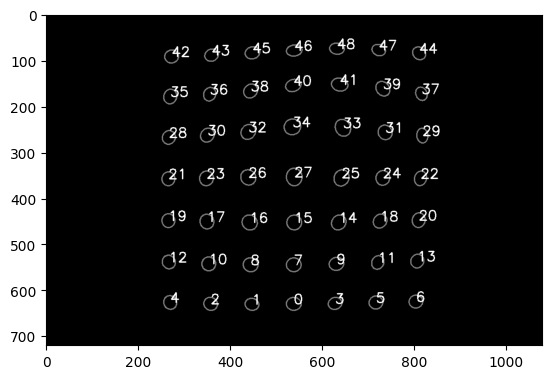

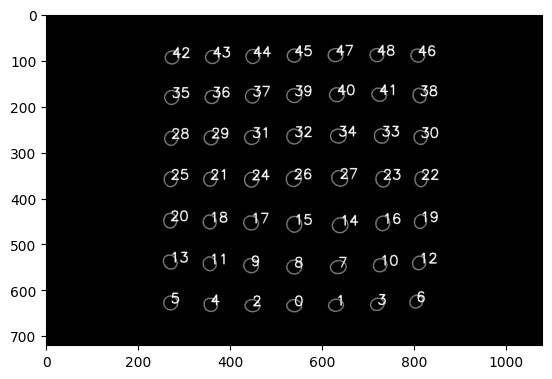

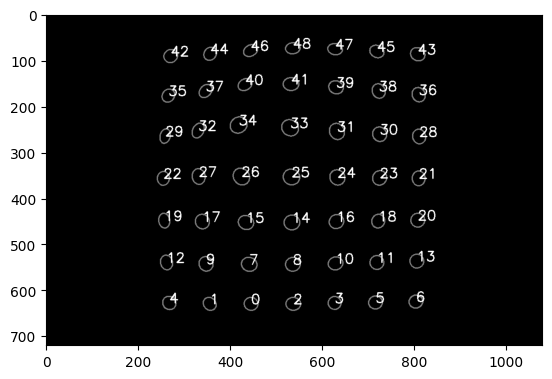

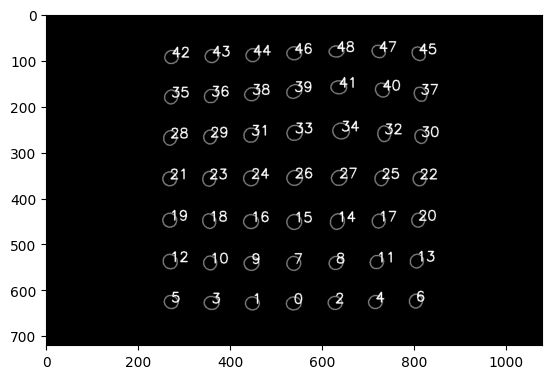

In [11]:
def show_ellipses(df):
    # create a black image
    img = np.zeros([720, 1080], np.uint8)
    i = 0
    # iterate over each row in the dataframe
    for index, row in df.iterrows():
        id = int(row['id'])
        u = row['u']
        v = row['v']
        a = row['a']
        b = row['b']
        theta = row['theta']

        center = (int(u), int(v))
        axes = (int(a), int(b))
        angle = theta

        # draw the ellipse on the image
        cv2.ellipse(img, center, axes, angle, 0, 360, (125, 255, 255), 2)
        cv2.putText(img, str(id), center, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_4)
        i+=1

    # display the image using pyplot
    plt.imshow(img, cmap="gray")
    plt.show()

for i in random_set:
    show_ellipses(dfs[i])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


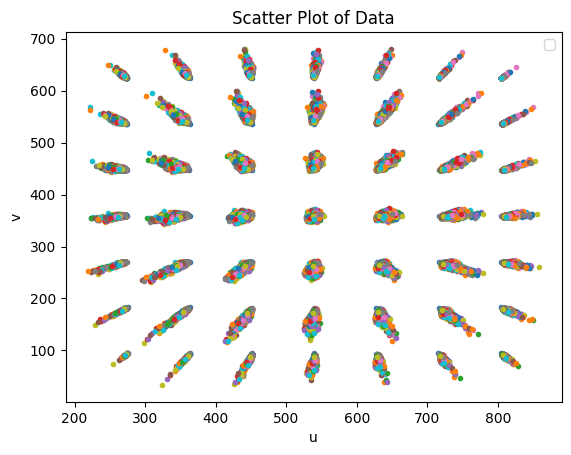

In [12]:
import matplotlib.pyplot as plt

# Assuming your array of DataFrames is named data_array
for i, df in enumerate(dfs):
    # Extract the 'u' and 'v' columns from the DataFrame
    u = df['u']
    v = df['v']

    # Create a scatter plot with 'u' on the x-axis and 'v' on the y-axis
    plt.scatter(u, v, marker=".")

# Add axis labels, a title, and a legend
plt.xlabel('u')
plt.ylabel('v')
plt.title('Scatter Plot of Data')
plt.legend()
plt.show()

<h1> Using KMEAN to discriminate each point </h1>

In [13]:
## prepare data

dot_positions = np.zeros((0,2))

for df in dfs:
    # Extract the 'u' and 'v' columns from the DataFrame100
    u = df['u'].values.reshape((-1, 1))
    v = df['v'].values.reshape((-1, 1))

    # Concatenate the 'u' and 'v' columns into a single ndarray
    positions = np.concatenate((u, v), axis=1)

    # Append the positions to the dot_positions ndarray
    dot_positions = np.vstack((dot_positions, positions))

print("shape" ,dot_positions.shape)
dot_positions

shape (49000, 2)


array([[539.78045654, 624.0055542 ],
       [451.63247681, 624.        ],
       [363.20742798, 624.        ],
       ...,
       [445.49127197,  71.79205322],
       [633.56915283,  68.22241974],
       [539.19482422,  62.0882225 ]])

/home/hayashi/Desktop/tactile_train/tactile_train/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


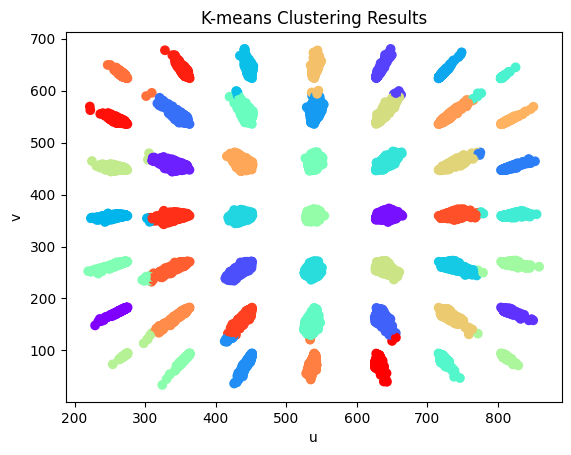

In [14]:
from sklearn.cluster import KMeans,DBSCAN


kmeans = KMeans(n_clusters=49, random_state=50)
cluster_labels = kmeans.fit_predict(dot_positions)


plt.scatter(dot_positions[:, 0], dot_positions[:, 1], c=cluster_labels, cmap='rainbow')
# Add axis labels and a title
plt.xlabel('u')
plt.ylabel('v')
plt.title('K-means Clustering Results')
plt.show()

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, -1}


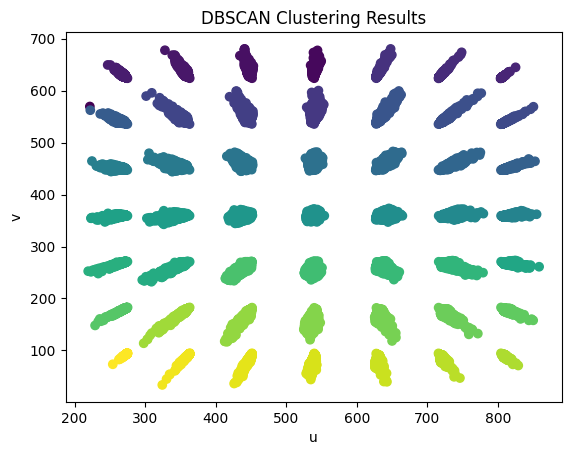

In [15]:
from sklearn.cluster import KMeans,DBSCAN


# Assuming your data is in an ndarray named dot_positions with shape (N, 2)
dbscan = DBSCAN(eps=20, min_samples=5)  # Initialize the DBSCAN clustering algorithm with eps and min_samples parameters

cluster_labels = dbscan.fit_predict(dot_positions)  # Fit the DBSCAN algorithm to the data and get the cluster assignments

# Create a scatter plot with 'u' on the x-axis and 'v' on the y-axis, color-coded by cluster assignment
plt.scatter(dot_positions[:, 0], dot_positions[:, 1], c=cluster_labels)

# Add axis labels and a title
print(set(cluster_labels))
plt.xlabel('u')
plt.ylabel('v')
plt.title('DBSCAN Clustering Results')
plt.show()    
data = np.loadtxt(file_path+file_name, delimiter=",")
df = pd.DataFrame(data,columns=cols)

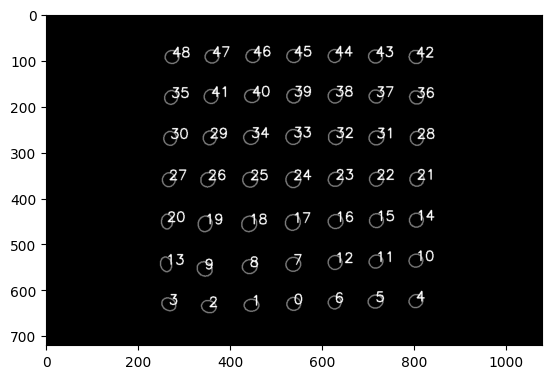

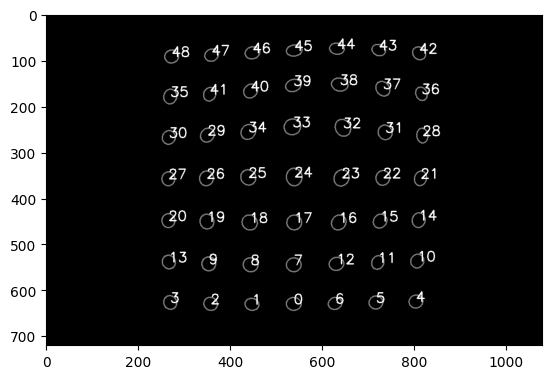

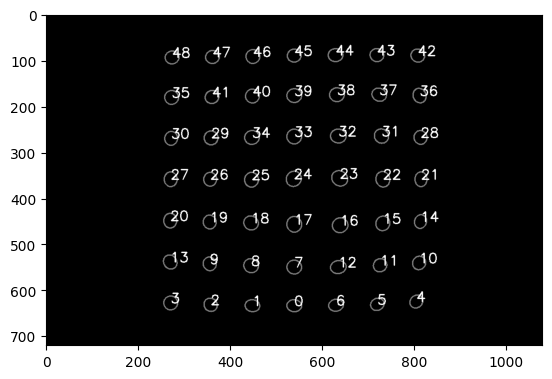

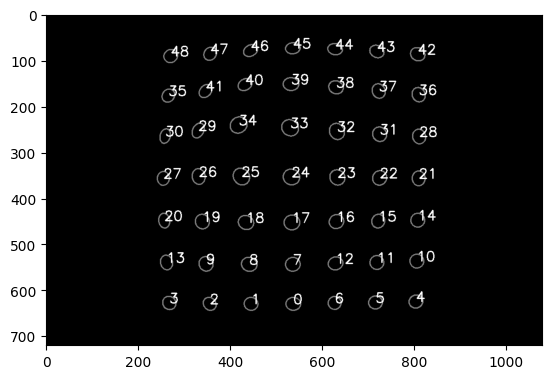

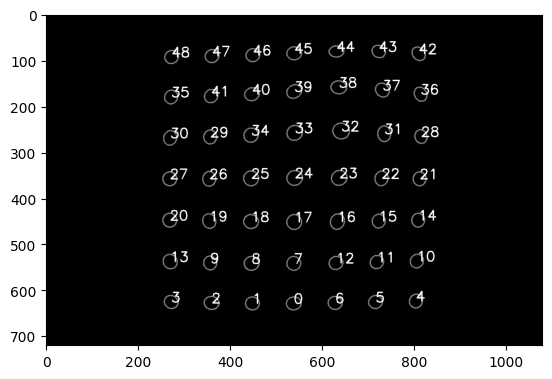

In [16]:
stride = int(len(cluster_labels)/len(dfs))

bad_data_index = []

for i in range(len(dfs)):
    labels = cluster_labels[i*stride:(i+1)*stride]
    if -1 in labels:
        bad_data_index.append(i)
        pass

    dfs[i]['id'] = labels

for i in random_set:
    show_ellipses(dfs[i])


In [17]:
dfs = [dfs[i] for i in range(len(dfs)) if i not in bad_data_index]

In [18]:
file_path = "data/"
cols = ['id', 'u', 'v', 'a', 'b', 'theta']

output = []

dataSize = (17,17)

for i in range(NUM_DATASET):
    file_name = f"forceDist_{i}.csv"
    data = np.loadtxt(file_path+file_name, delimiter=",").reshape(dataSize)
    data = np.rot90(data)
    output.append(data)

output = [output[i] for i in range(len(output)) if i not in bad_data_index]
    

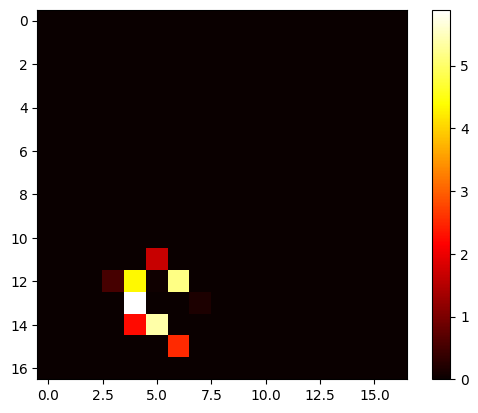

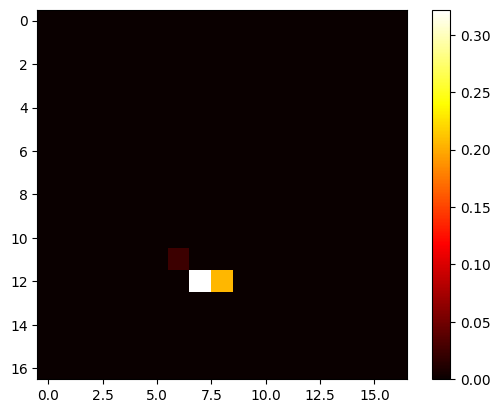

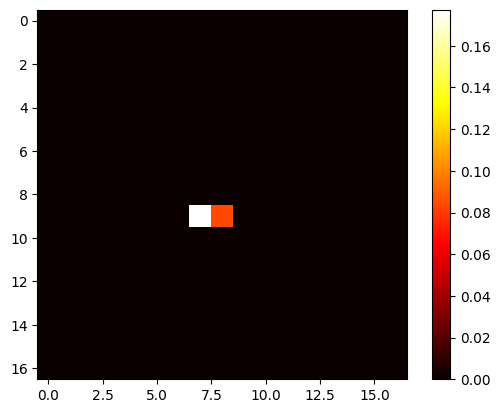

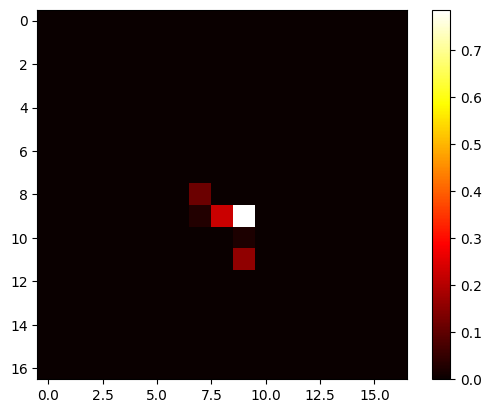

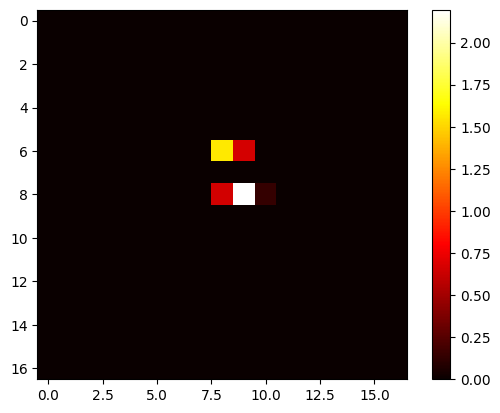

[None, None, None, None, None]

In [19]:
def showForceDist(data):
    plt.imshow(data, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

[showForceDist(output[i]) for i in random_set]


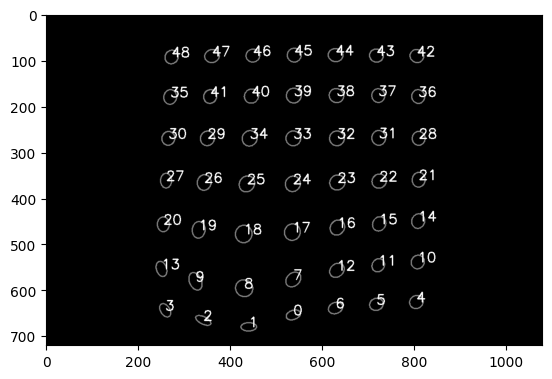

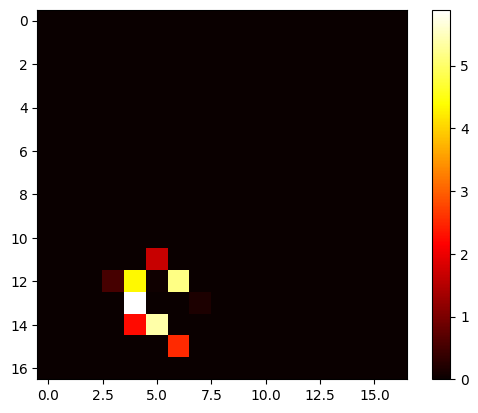

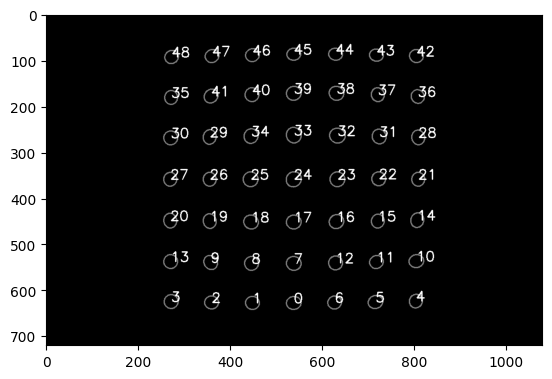

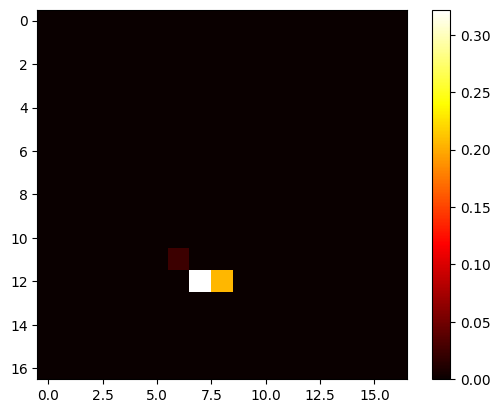

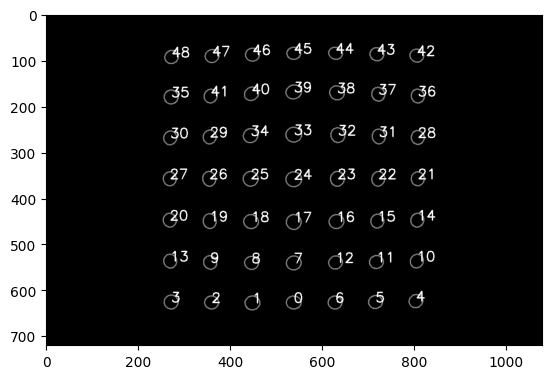

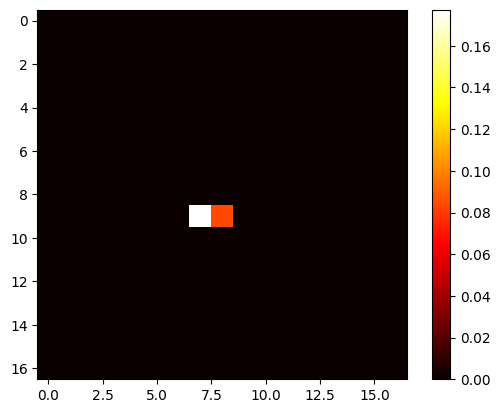

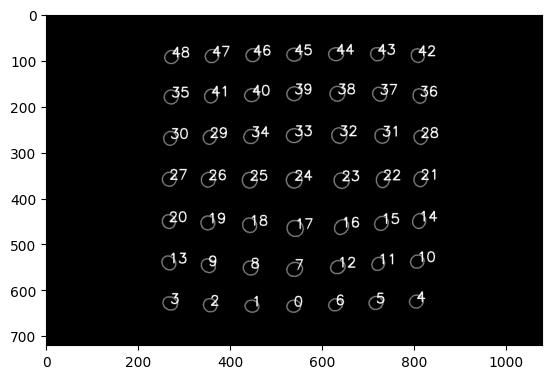

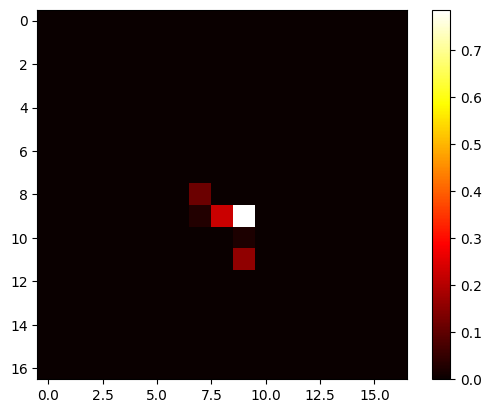

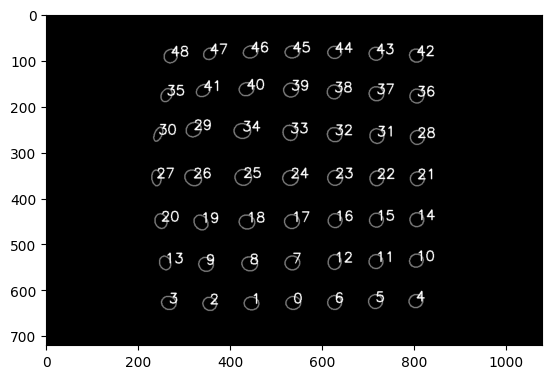

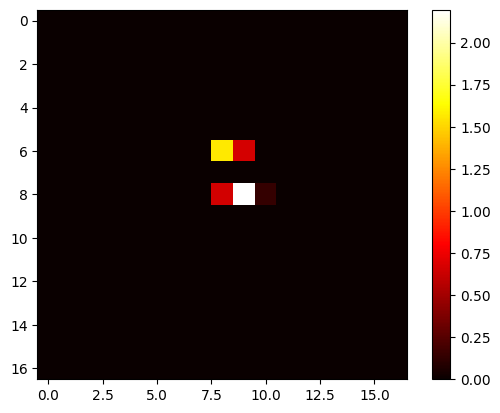

In [20]:
random.seed(10)

for i in random_set:
    
    show_ellipses(dfs[i])
    showForceDist(output[i])

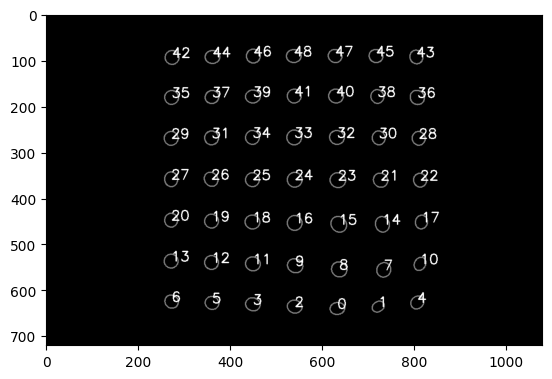

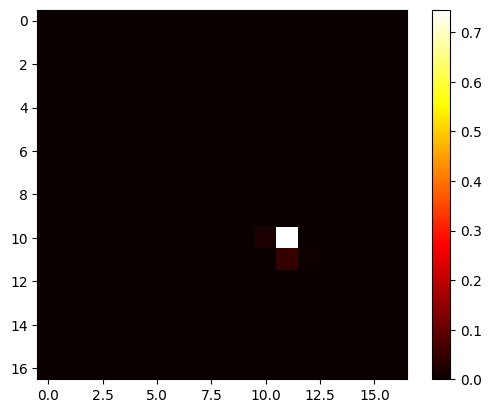

In [21]:
i = 60
file_name = f"feature_{i}.csv"
data = np.loadtxt(file_path+file_name, delimiter=",")
df = pd.DataFrame(data,columns=cols)
show_ellipses(df)
file_name = f"forceDist_{i}.csv"
data = np.loadtxt(file_path+file_name, delimiter=",").reshape(dataSize)
data = np.rot90(data)
showForceDist(data)

In [22]:
print(len(dfs),len(output))

999 999


In [23]:
from sklearn.model_selection import train_test_split

# assume your input data X and output data y are already loaded and preprocessed

# output_reshape = [np.reshape(y,(1,17*17)) for y in output]
output_reshape = np.array(output)
output_reshape = output_reshape.reshape(output_reshape.shape[0], -1)


# set the test size (portion of data to use for testing)
test_size = 0.2

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dfs, output_reshape, test_size=test_size, random_state=42)

# check the shapes of the resulting datasets
print(f"X_train shape: {len(X_train)}")
print(f"X_test shape: {len(X_test)}")
print(f"y_train shape: {len(y_train)}")
print(f"y_test shape: {len(y_test)}")

X_train shape: 799
X_test shape: 200
y_train shape: 799
y_test shape: 200


In [26]:
from tensorflow import keras

# Define the input and output dimensions
input_dim = 294
output_dim = 17*17

# Define the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_dim=input_dim),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(512, activation='sigmoid'),
    keras.layers.Dense(output_dim, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='MSE', metrics=['MSE'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               37760     
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 289)               148257    
                                                                 
Total params: 613,281
Trainable params: 613,281
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Assuming you have input data `X` with shape (num_samples, 49, 6) and output data `y` with shape (num_samples, 17, 17)

# Split the data into training and testing sets
output_new = np.array(output)
dfs_new = np.array(dfs)
X_train, X_test, y_train, y_test = train_test_split(dfs_new, output_new, test_size=0.2, random_state=42)

# Fit the model to the training data
model.fit(X_train.reshape(-1, input_dim), y_train.reshape(-1, output_dim), epochs=100, batch_size=32, validation_data=(X_test.reshape(-1, input_dim), y_test.reshape(-1, output_dim)))


Epoch 1/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0422 - MSE: 0.0422 - val_loss: 0.0493 - val_MSE: 0.0493
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0422 - MSE: 0.0422 - val_loss: 0.0493 - val_MSE: 0.0493
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0422 - MSE: 0.0422 - val_loss: 0.0494 - val_MSE: 0.0494
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0422 - MSE: 0.0422 - val_loss: 0.0493 - val_MSE: 0.0493
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0422 - MSE: 0.0422 - val_loss: 0.0493 - val_MSE: 0.0493
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0422 - MSE: 0.0422 - val_loss: 0.0493 - val_MSE: 0.0493
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0422 - MSE: 0.0422 - val_loss: 0.0494 - val_MSE: 0.0494
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0422 - M

1/1 [==============================] - 0s 11ms/step


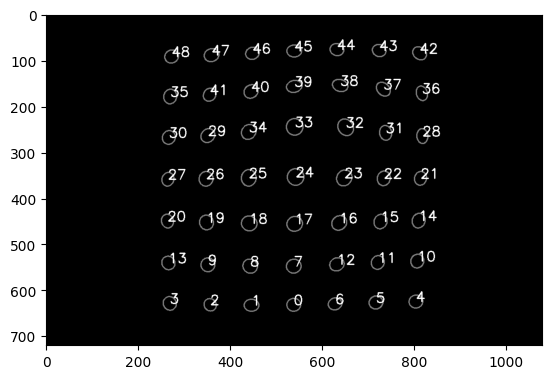

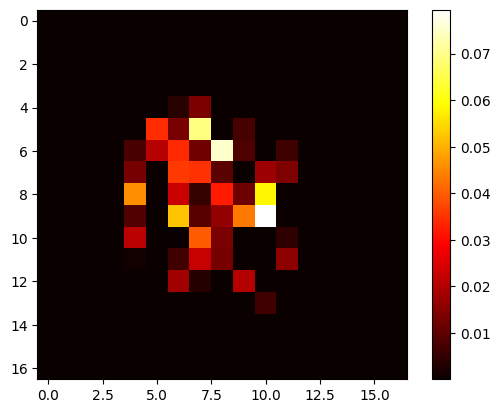

In [41]:
i = 5
res = model.predict(np.array(dfs[10]).reshape(-1,input_dim))

show_ellipses(dfs[10])
showForceDist(res.reshape(17,17))